# Lab 3 - DATA PREPROCESSING AND REGRESSION

In [220]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Question 1

In [221]:
df= pd.read_csv('hepatitis_csv.csv')
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [222]:
threshold=0.75*df.shape[0]
bad_col=df.isnull().sum()
req_col=bad_col[bad_col < threshold].index
df = df[req_col]
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [223]:
df = df.dropna(how = 'all') 
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [224]:
cols = df.columns

for col in cols:
    curr = type(df[col][0])
    if df[col].isnull().sum() > 0:
        if curr == bool:
            df[col].fillna(False, inplace=True)
        elif curr  == np.float64:
            df[col].fillna(0.0,inplace = True)
            
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,0.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,0.0,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,0.0,False,live
3,31,female,False,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,0.0,200.0,4.0,0.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,0.0,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,0.0,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,0.0,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [225]:
df = df.to_numpy()
df

array([[30, 'male', False, ..., 0.0, False, 'live'],
       [50, 'female', False, ..., 0.0, False, 'live'],
       [78, 'female', True, ..., 0.0, False, 'live'],
       ...,
       [61, 'female', False, ..., 0.0, True, 'live'],
       [53, 'male', False, ..., 48.0, True, 'live'],
       [43, 'female', True, ..., 42.0, True, 'die']], dtype=object)

In [226]:
X = df[:, :-1] 
y = df[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Features:\n", X_train)
print("\nTesting Features:\n", X_test)

print("\nTraining Target:\n", y_train)
print("\nTesting Target:\n", y_test)


Training Features:
 [[30 'female' False ... 3.9 100.0 True]
 [42 'female' True ... 0.0 0.0 True]
 [30 'female' False ... 4.0 100.0 False]
 ...
 [47 'female' False ... 0.0 0.0 False]
 [33 'female' True ... 4.0 0.0 True]
 [27 'female' False ... 3.0 66.0 True]]

Testing Features:
 [[36 'female' True False False False False True False False False False
  False 0.7 62.0 224.0 4.2 100.0 False]
 [51 'female' True False True False False True True True True False True
  1.0 0.0 20.0 3.0 63.0 True]
 [62 'female' False False True True False False False False False False
  False 1.0 0.0 60.0 0.0 0.0 False]
 [51 'female' False True True True False True False False False False
  False 1.0 78.0 58.0 4.6 52.0 False]
 [61 'female' False False True True False False False False True False
  False 0.0 0.0 0.0 0.0 0.0 True]
 [37 'female' True False False False False True False False False False
  False 0.7 26.0 58.0 4.5 100.0 False]
 [52 'female' False False False False False True False False False False


## Question 2 

In [227]:
data = {
    'study_time': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'score': [2, 3, 5, 6, 7, 8, 7, 9, 9, 10]
}

df1 = pd.DataFrame(data)

df1.to_csv('study_data.csv', index=False)

df1 = pd.read_csv('study_data.csv')
x = df1['study_time'].values
y = df1['score'].values

In [228]:
xn = np.vstack([np.ones(len(x)), x]).T

B = np.linalg.inv(xn.T @ xn) @ xn.T @ y
B0, B1 = B

y_pred = xn @ B

rmse = np.sqrt(((y - y_pred) ** 2).mean())

print(f'Pedhazur Method\nB0 intercept : {B0} \nB1 slope : {B1}\nRMSE : {rmse}\nPredicted values : {y_pred}')

Pedhazur Method
B0 intercept : 2.000000000000002 
B1 slope : 0.8363636363636364
RMSE : 0.6849021164304495
Predicted values : [ 2.83636364  3.67272727  4.50909091  5.34545455  6.18181818  7.01818182
  7.85454545  8.69090909  9.52727273 10.36363636]


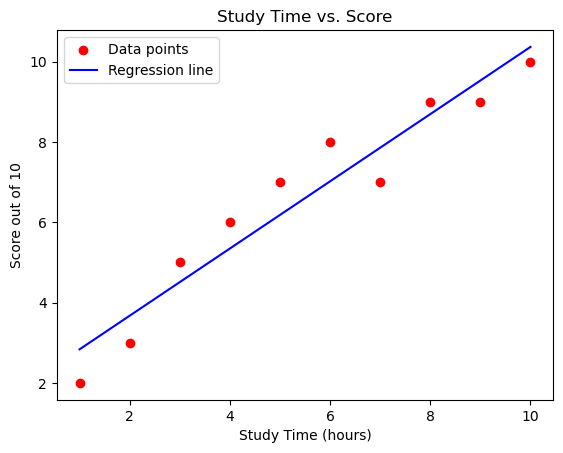

In [229]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='red', label='Data points')

plt.plot(x, y_pred, color='blue', label='Regression line')

plt.xlabel('Study Time (hours)')
plt.ylabel('Score out of 10')
plt.legend()
plt.title('Study Time vs. Score')
plt.show()

In [230]:
# Calculus Method
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

B1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
B0 = y_mean - B1*x_mean

y_pred_calc = B1*x + B0

rmse_calc = np.sqrt(((y-y_pred_calc)**2).mean())

print(f'Calculus Method\nB0 intercept : {B0} \nB1 slope : {B1}\nRMSE : {rmse_calc}\nPredicted values : {y_pred_calc}')

Calculus Method
B0 intercept : 2.0 
B1 slope : 0.8363636363636363
RMSE : 0.6849021164304496
Predicted values : [ 2.83636364  3.67272727  4.50909091  5.34545455  6.18181818  7.01818182
  7.85454545  8.69090909  9.52727273 10.36363636]


In [231]:
print(f'Pedhazur Method - B0: {B0}, B1: {B1}')
print(f'Calculus Method - B0: {B0}, B1: {B1}')

Pedhazur Method - B0: 2.0, B1: 0.8363636363636363
Calculus Method - B0: 2.0, B1: 0.8363636363636363


In [232]:
study_time_test = 8
score_pred = B0 + B1 * study_time_test

print(f'Predicted score for 10 hours of study time: {score_pred}')

Predicted score for 10 hours of study time: 8.690909090909091
